In [16]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [17]:
drugs = pd.read_csv('drug-use-by-age.csv')
drugs.head(7)

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0


In [18]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      17 non-null     object 
 1   n                        17 non-null     int64  
 2   alcohol-use              17 non-null     float64
 3   alcohol-frequency        17 non-null     float64
 4   marijuana-use            17 non-null     float64
 5   marijuana-frequency      17 non-null     float64
 6   cocaine-use              17 non-null     float64
 7   cocaine-frequency        17 non-null     object 
 8   crack-use                17 non-null     float64
 9   crack-frequency          17 non-null     object 
 10  heroin-use               17 non-null     float64
 11  heroin-frequency         17 non-null     object 
 12  hallucinogen-use         17 non-null     float64
 13  hallucinogen-frequency   17 non-null     float64
 14  inhalant-use             17 

In [19]:
for i in drugs:
    for j in range(len(drugs[i])):
        if (drugs[i][j] == '-'):
            try:
                drugs[i][j] = (float(drugs[i][j-1])+float(drugs[i][j+1]))/2
            except:
                if j == 16:
                    drugs[i][j] = float(drugs[i][j-1])/2
                elif j == 0:
                    drugs[i][j] = float(drugs[i][j+1])/2

drugs[drugs.select_dtypes(exclude = 'number').columns.to_list()[1:]] = drugs[drugs.select_dtypes(exclude = 'number').columns.to_list()[1:]].astype('float')

<ipython-input-19-7a10f9bc33d5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs[i][j] = float(drugs[i][j-1])/2
<ipython-input-19-7a10f9bc33d5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs[i][j] = float(drugs[i][j+1])/2
<ipython-input-19-7a10f9bc33d5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs[i][j] = (float(drugs[i][j-1])+float(drugs[i][j+1]))/2


In [20]:
drugs_names = [i.split('-')[0] for i in drugs.columns.to_list()[3:28:2]]
full_drugs_names = drugs.columns.to_list()[3:28:2]

col = []
for i in drugs_names:
    for j in range(17):
        col.append(i)

data = pd.DataFrame(columns=['drugs'], data = col)

values = np.array(0)

for i in full_drugs_names:
    values = np.append(values,drugs[i].to_list())

values = values[1:]

data['values'] = values
data

,drugs,values
0,alcohol,3.0
1,alcohol,6.0
2,alcohol,5.0
3,alcohol,6.0
4,alcohol,10.0
...,...,...
216,sedative,4.0
217,sedative,10.0
218,sedative,10.0
219,sedative,104.0


<AxesSubplot:xlabel='Frequency', ylabel='Drugs'>

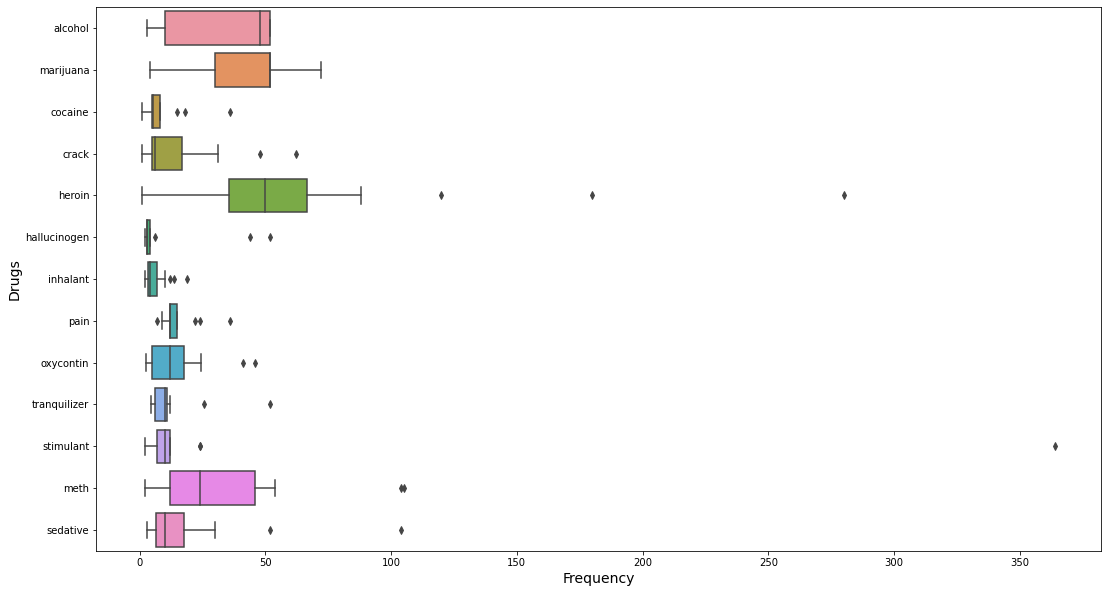

In [21]:
ax = sns.boxplot(x = 'values', y = 'drugs', data = data, orient='h')
ax.figure.set_size_inches(18,10)
ax.set_xlabel('Frequency', fontsize=14)
ax.set_ylabel('Drugs', fontsize=14)
ax

In [22]:
def percentage_use(ds,start = 0 , slice = False):
    percentage_use = []
    for i in ds.columns.to_list()[2:28:2]:
        sum_people = 0
        for j in range(start,start + len(ds),1):
            sum_people += ds['n'][j] * (ds[i][j] * 0.01)
        if (not slice):
            percentage_use.append(float(100*sum_people / sum(ds['n'])))
        else:
            percentage_use.append(sum_people)
    return percentage_use

In [23]:
use_drugs = pd.DataFrame(columns = ['drugs','Percentage of use'], index = range(0, 13))
use_drugs['drugs'] = drugs.columns.to_list()[2:28:2]

use_drugs['drugs'] = use_drugs['drugs'].apply(lambda x: x.split('-')[0]) 

use_drugs['Percentage of use'] = percentage_use(drugs)
use_drugs = use_drugs.sort_values('Percentage of use')
use_drugs.reset_index(inplace=True)
use_drugs.drop(columns= ['index'], inplace=True)
use_drugs

,drugs,Percentage of use
0,sedative,0.276131
1,crack,0.319082
2,heroin,0.353919
3,meth,0.376077
4,oxycontin,0.897349
5,inhalant,1.259881
6,stimulant,1.811006
7,cocaine,2.161750
8,tranquilizer,2.759050
9,hallucinogen,3.084273


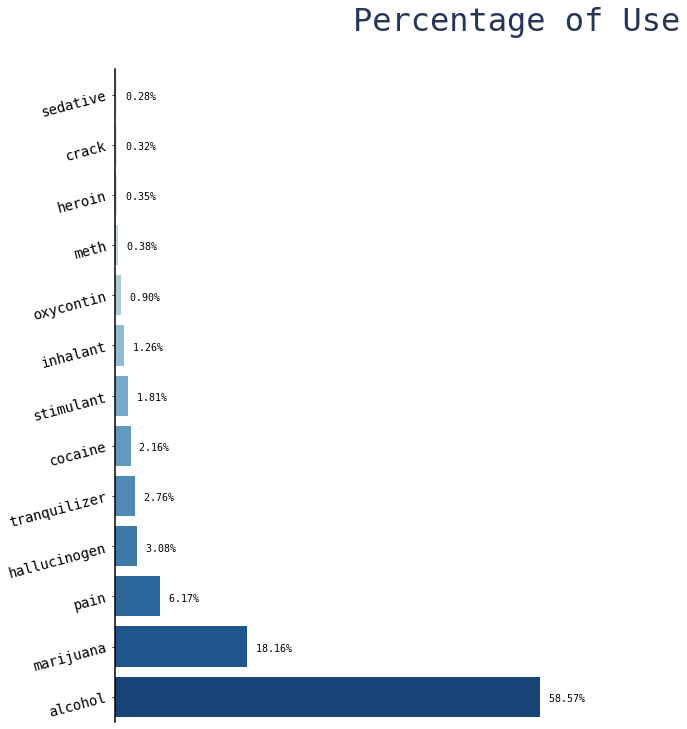

In [26]:
plt.figure(figsize=(8,12))
plt.title('Percentage of Use', fontsize = 32, fontname = 'monospace', x = 0.9, y = 1.05, color = '#283655')
b = sns.barplot(data = use_drugs, x = 'Percentage of use', y = 'drugs', color = 'darkred',palette='Blues')
plt.xticks([])
plt.yticks(fontname = 'monospace', fontsize = 14, rotation = 15)
plt.ylabel('')
plt.xlabel('')

b.spines['left'].set_linewidth(1.5)
b.spines['top'].set_visible(False)
b.spines['bottom'].set_visible(False)
b.spines['right'].set_visible(False)

k = 0.1
for i in use_drugs['Percentage of use']:
  plt.text(i + 0.4,k,f'{i: .2f}%', color= 'black', fontname='monospace')
  k = k+ 1.0

In [27]:
drugs_minor = drugs.head(6)
drugs_minor

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,1.50,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,2.5,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.00,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,6.25,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.50,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.00,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.00,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5


In [28]:
use_drugs_minor = pd.DataFrame(columns=['drugs','percentage of use'],index=range(0,13))
use_drugs_minor['drugs'] = drugs_minor.columns.to_list()[2:28:2]
use_drugs_minor['drugs'] = use_drugs_minor['drugs'].apply(lambda x: x.split('-')[0])

use_drugs_minor['percentage of use'] = percentage_use(drugs_minor)
use_drugs_minor = use_drugs_minor.sort_values('percentage of use')

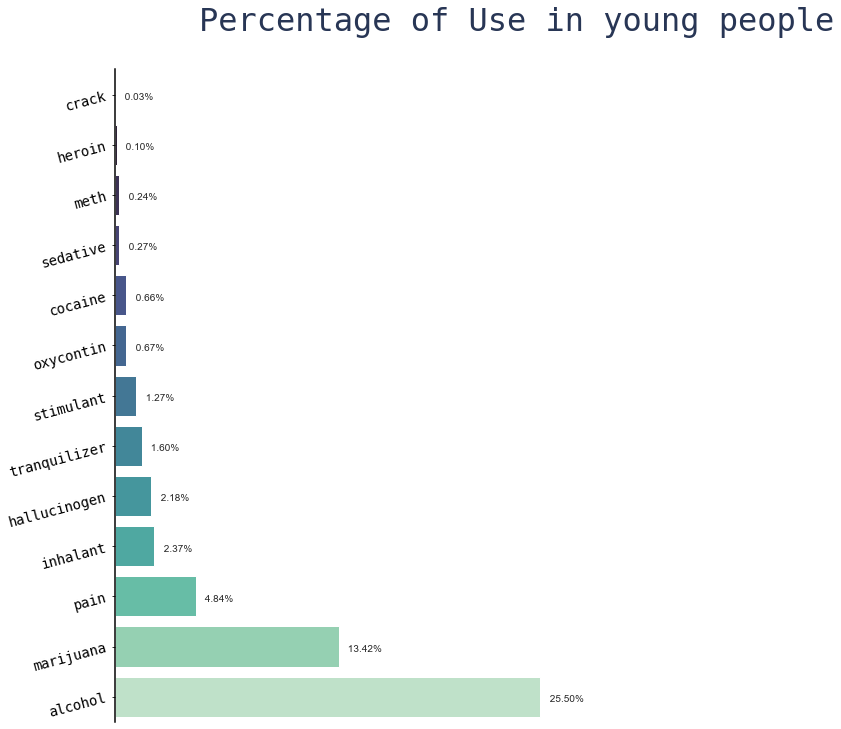

In [29]:
fig, ax = plt.subplots(figsize=(8,12))

sns.set_style("white")
plt.title('Percentage of Use in young people', fontsize = 32, fontname = 'monospace', x = 0.9, y = 1.05, color = '#283655')
a = sns.barplot(x = 'percentage of use', y = 'drugs', data = use_drugs_minor, palette='mako')

plt.xticks([])
plt.yticks(fontname = 'monospace', fontsize = 14, rotation = 15)
plt.ylabel('')
plt.xlabel('')


a.spines['left'].set_linewidth(1.5)
a.spines['top'].set_visible(False)
a.spines['bottom'].set_visible(False)
a.spines['right'].set_visible(False)

k = 0.1
for i in use_drugs_minor['percentage of use']:
  plt.text(i + 0.4,k,f'{i: .2f}%')
  k = k+ 1.0

plt.show()

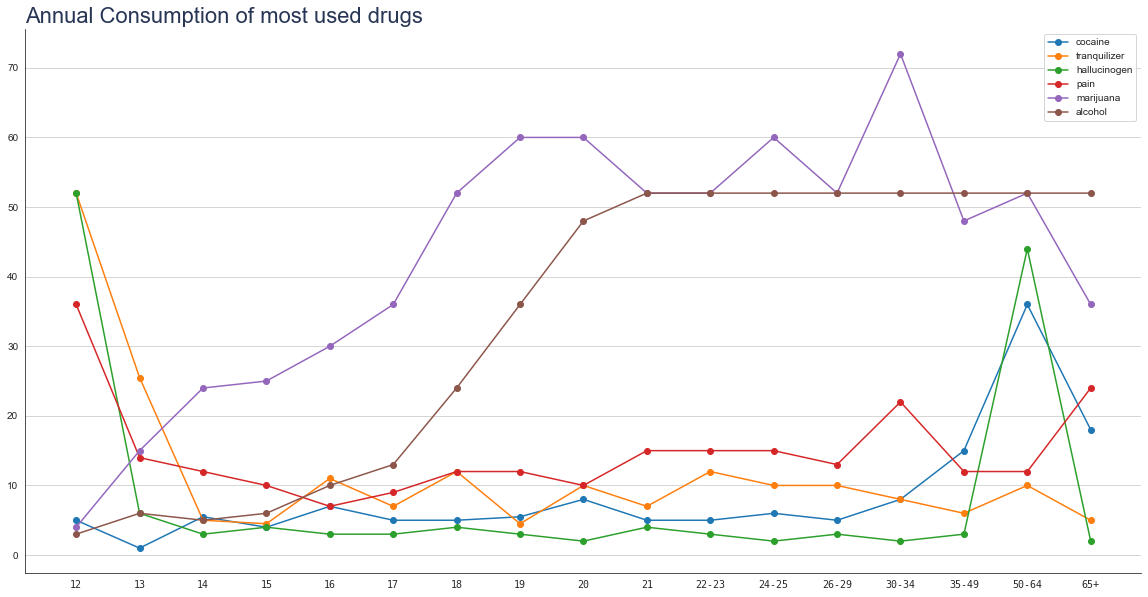

In [30]:
# plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

drugs_most_used = use_drugs.tail(6)["drugs"]
drugs_most_used = list(drugs_most_used[:])
drugs_most_used = [x+'-frequency' for x in drugs_most_used]
drugs_most_used[3] = 'pain-releiver-frequency'
plt.grid(axis='y')

j = 0
for i in drugs_most_used:
  plt.plot(drugs['age'],drugs[i], label = drugs_most_used[j].split('-')[0], marker = 'o')
  j = j+1

plt.title('Annual Consumption of most used drugs',fontsize = 22, color = '#283655', loc='left')

plt.xticks(fontname = 'monospace')
plt.legend()
plt.show()

['sedative-frequency', 'crack-frequency', 'heroin-frequency', 'meth-frequency', 'oxycontin-frequency', 'inhalant-frequency', 'stimulant-frequency']


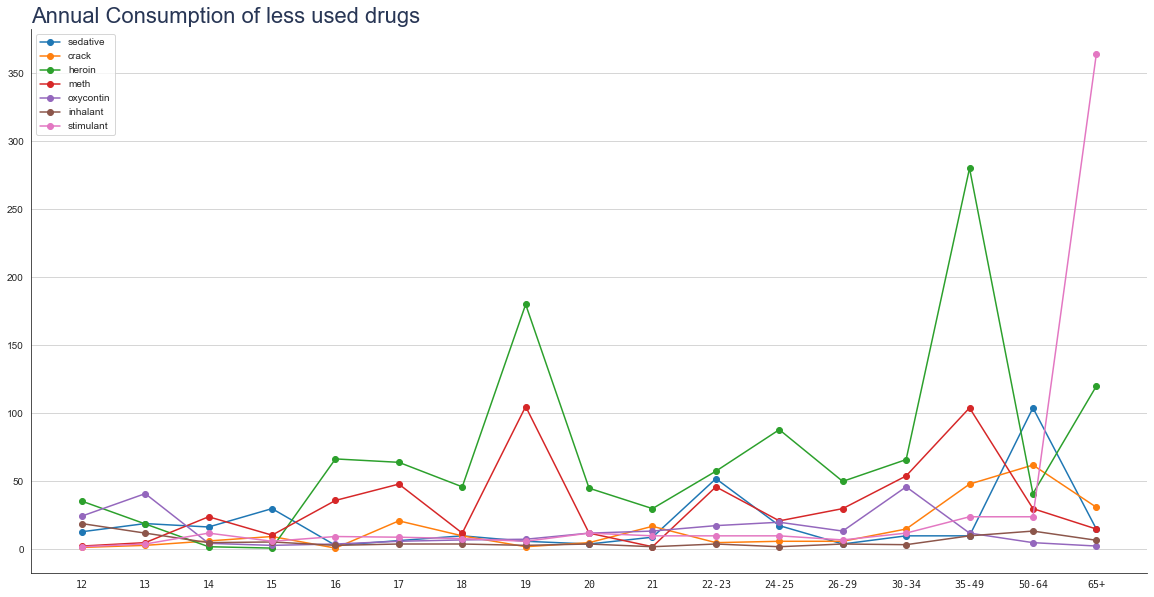

In [31]:
# plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(20,10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

drugs_less_used = use_drugs.head(7)["drugs"]
drugs_less_used = list(drugs_less_used[:])
drugs_less_used = [x+'-frequency' for x in drugs_less_used]
print(drugs_less_used)
plt.grid(axis='y')

j = 0
for i in drugs_less_used:
  plt.plot(drugs['age'],drugs[i], label = drugs_less_used[j].split('-')[0], marker = 'o')
  j = j+1

plt.title('Annual Consumption of less used drugs',fontsize = 22, color = '#283655', loc='left')

plt.xticks(fontname = 'monospace')
plt.legend()
plt.show()

In [32]:
mean_drugs = []
nomes = drugs.columns.to_list()[3:28:2]
    
for i in nomes:
  mean_drugs.append(drugs[i].mean())

nomes = [i.split('-')[0] for i in drugs.columns.to_list()[3:28:2]]

means = pd.DataFrame(index = nomes, data = mean_drugs, columns=['Frequency mean'])
means.reset_index(inplace=True)
means.columns = ['Drugs','Frequency mean']
means

,Drugs,Frequency mean
0,alcohol,33.352941
1,marijuana,42.941176
2,cocaine,8.470588
3,crack,14.661765
4,heroin,70.073529
5,hallucinogen,8.411765
6,inhalant,6.191176
7,pain,14.705882
8,oxycontin,14.088235
9,tranquilizer,11.735294


In [33]:
drugs['drug_coef'] = 0
drugs['drug_coef'] = drugs['drug_coef'].astype('float')
for i in drugs.columns.to_list()[4:28:2]:
    for k in range(len(drugs)):
        drugs['drug_coef'][k] += drugs['n'][k] * (drugs[i][k] * 0.01)
        
for i in range(len(drugs)):
    drugs['drug_coef'][i] = round(drugs['drug_coef'][i] / drugs['n'][i], 2)

<ipython-input-33-91d3902ce094>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs['drug_coef'][k] += drugs['n'][k] * (drugs[i][k] * 0.01)
<ipython-input-33-91d3902ce094>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugs['drug_coef'][i] = round(drugs['drug_coef'][i] / drugs['n'][i], 2)


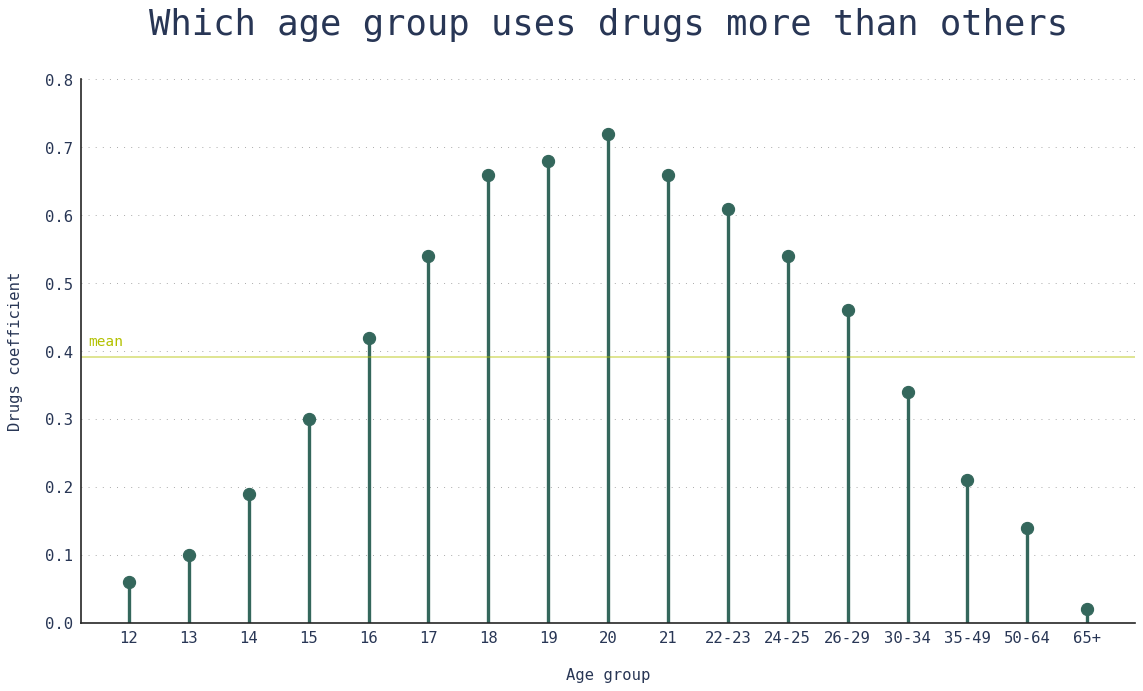

In [35]:
fig, ax = plt.subplots(figsize = (17, 9), dpi = 80)
ax.set_title('Which age group uses drugs more than others', fontsize = 32, fontname = 'monospace', x = 0.5, y = 1.07, color = '#283655')
ax.vlines(x = drugs['age'], ymin = 0, ymax = drugs['drug_coef'], color = '#34675C', linewidth = 3)
ax.scatter(x = drugs['age'], y = drugs['drug_coef'], s = 120, color = '#34675C')
plt.xticks(fontname = 'monospace', fontsize = 14, color = '#283655')
plt.yticks(fontname = 'monospace', fontsize = 14, color = '#283655')
ax.set_ylim(0, 0.8)
plt.ylabel('Drugs coefficient', labelpad = 20, fontname = 'monospace', fontsize = 14, color = '#283655')
plt.xlabel('Age group', labelpad = 20, fontname = 'monospace', fontsize = 14, color = '#283655')
plt.grid(color = 'gray', linestyle = ':', axis = 'y', alpha = 0.8, zorder = 0,  dashes = (1,7))

for i in ['left', 'bottom']:
    ax.spines[i].set_linewidth(1.5)
for w in ['right', 'top']:
    ax.spines[w].set_visible(False)

plt.axhline(drugs['drug_coef'].mean(), 0, 1, color = '#B3C100', alpha = 0.5)
plt.figtext(0.13, 0.51, 'mean', fontsize = 13, fontname = 'monospace', color = '#B3C100')

plt.show()